In [24]:
% matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit


In [25]:
pg = pd.read_excel('/home/ariel/Desktop/02-04-2017_2.xlsx')
pg1 = pd.read_excel('/home/ariel/Desktop/3-31-2017.xlsx')

In [49]:
stdard = pg1.ix[:2,2:12].T    # cambie pg por pg1
stdard['av'] = stdard.mean(axis=1)

m, i = [], 5.0
for n in range(len(stdard)):
    i /=2 
    m.append(i)
stdard['cc'] = m

stdard.loc[10,'cc'] = 0
#stdard = stdard.iloc[[0,1,11],[2,3]]

In [43]:
#s89o1, s89o2, s90o1, s90o2 = pg.ix[5,0:4].values.astype(int)
#s89_1 = pg.ix[6,0:4].values.astype(int)
#s89_2 = pg.ix[6,5:9].values.astype(int)
#s90_1 = pg.ix[7,0:4].values.astype(int)
#s90_2 = pg.ix[7,5:9].values.astype(int)
libs = pg1.ix[2,:4].values.astype(int)

In [44]:
def line(x,a,b):
    return a*x + b

x,y = zip(*stdard[['cc','av']].as_matrix())

popt, pcov = curve_fit(line,x,y)
a,b = popt

<font color='blue'><font size=5>the fitting is not perfect...</font size></font color>

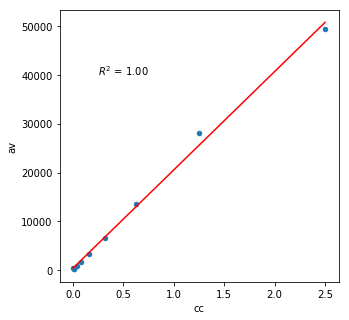

In [51]:
from scipy import stats as st
from matplotlib import rc

stdard.plot.scatter(x='cc', y='av', figsize=(5,5))
plt.plot(x,[line(i,a,b) for i in x], color='r')
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
plt.text(0.25,40000,''.join([r'$R^2$ = ', "{:.2f}".format(r_value**2)]))

In [46]:
def conc(y):
    return (y-b)/a

<font color='blue'><font size=5>But these are the results</font size></font color>

In [50]:
#keys = ['s89o1','s89o2','s90o1','s90o2','s89_1','s89_2','s90_1','s90_2']

#for i,j in zip([s89o1,s89o2,s90o1,s90o2,s89_1,s89_2,s90_1,s90_2],keys):
#    print 'sample: ',j,' = ',conc(i),' ng/uL'
print conc(libs)

[ 0.96043134  0.74241841  0.67959691  0.70725824]
